In [4]:
# =============================================================================
# 1️⃣  LOAD LIBRARIES & DATASET
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import os
from pathlib import Path

# Inline plot settings
%matplotlib inline
plt.style.use("default")

# Path to your file
DATA_PATH      = Path(os.getenv(
    "DATASET_PATH",
    "data/processed_data/case_3.csv",
))

# Load the CSV
df = pd.read_csv(DATA_PATH)

print(f"Dataset shape: {df.shape}")
df.head()



Dataset shape: (13495, 22)


,total_in_degree,total_out_degree,total_unique_in,total_unique_out,avg_in_transaction,avg_out_transaction,total_received,total_sent,net_balance,avg_in_time_interval,...,in_out_ratio,unique_in_ratio,unique_out_ratio,volume_ratio,net_balance_ratio,activity_index,time_interval_ratio,weighted_avg_tx,wallet_lifetime_sec,class
0,32,1,20,1,1.730997,0.086265,51.563351,0.950185,50.613166,0.000000,...,32.000000,0.625000,1.000000,54.266659,0.981572,3.300000e+09,0.000000,1.681157,48948.0,licit
1,42,2,42,2,0.010232,0.000333,0.090979,0.002134,0.088845,0.000000,...,21.000000,1.000000,1.000000,42.634095,0.976545,4.400000e+09,0.000000,0.009782,613204.0,licit
2,62,2,62,2,0.074033,0.036248,8.409666,0.277726,8.131940,0.000000,...,31.000000,1.000000,1.000000,30.280478,0.966975,6.400000e+09,0.000000,0.072852,5983.0,licit
3,5308,199,5039,139,6.717693,0.131803,25964.169313,264.300357,25699.868956,0.115907,...,26.673367,0.949322,0.698492,98.237360,0.989821,7.650501e+03,0.330982,6.479707,9100499.0,licit
4,1497,14,1491,12,0.095017,0.231538,1977.922946,20.954501,1956.968445,0.000000,...,106.928571,0.995992,0.857143,94.391315,0.989406,1.511000e+11,0.000000,0.096282,7024.0,licit


In [5]:
# =============================================================================
# 2️⃣  OVERVIEW: DATA TYPES & MISSING VALUES
# =============================================================================
display(df.dtypes.to_frame("dtype"))

missing_cnt  = df.isna().sum()
missing_pct  = 100 * missing_cnt / len(df)
missing_tbl  = pd.DataFrame({"missing_cnt": missing_cnt,
                             "missing_pct": missing_pct})
display(missing_tbl[missing_tbl.missing_cnt > 0]
        .sort_values("missing_pct", ascending=False))


,dtype
total_in_degree,int64
total_out_degree,int64
total_unique_in,int64
total_unique_out,int64
avg_in_transaction,float64
avg_out_transaction,float64
total_received,float64
total_sent,float64
net_balance,float64
avg_in_time_interval,float64


,missing_cnt,missing_pct


In [6]:
# =============================================================================
# 3️⃣  DESCRIPTIVE STATISTICS
# =============================================================================
num_cols  = df.select_dtypes(include=[np.number]).columns
cat_cols  = df.select_dtypes(exclude=[np.number]).columns

print("Numeric features ⬇️")
display(df[num_cols].describe().T)

print("\nCategorical features – top 10 levels ⬇️")
for col in cat_cols:
    print(f"\n{col}:")
    display(df[col].value_counts(dropna=False).head(10))


Numeric features ⬇️


,count,mean,std,min,25%,50%,75%,max
total_in_degree,13495.0,3.884274e+04,1.060507e+05,2.000000e+00,104.000000,1.449000e+03,2.373250e+04,2.742296e+06
total_out_degree,13495.0,5.021357e+03,4.501405e+04,0.000000e+00,5.000000,6.200000e+01,3.720000e+02,2.229728e+06
total_unique_in,13495.0,2.474197e+04,7.036558e+04,1.000000e+00,84.000000,1.269000e+03,1.691350e+04,2.163079e+06
total_unique_out,13495.0,1.767832e+03,9.375493e+03,0.000000e+00,3.000000,3.000000e+01,1.975000e+02,4.004420e+05
avg_in_transaction,13495.0,1.255521e+01,1.076286e+03,5.265238e-06,0.026041,1.247969e-01,8.336979e-01,1.249617e+05
avg_out_transaction,13495.0,1.063467e+00,1.120920e+01,0.000000e+00,0.000939,1.010145e-02,1.207964e-01,9.225803e+02
total_received,13495.0,8.561245e+04,6.189386e+05,5.380000e-05,13.985076,3.116740e+02,7.180589e+03,2.172497e+07
total_sent,13495.0,9.389234e+03,1.505535e+05,0.000000e+00,0.246501,9.042486e+00,1.140362e+02,1.042515e+07
net_balance,13495.0,7.622321e+04,5.773304e+05,-3.527233e-13,8.148956,2.431012e+02,6.788047e+03,2.162874e+07
avg_in_time_interval,13495.0,3.016667e+00,1.727375e+01,0.000000e+00,0.000091,7.420037e-02,7.981167e-01,9.838936e+02



Categorical features – top 10 levels ⬇️

class:


licit    7152
fraud    6343
Name: class, dtype: int64

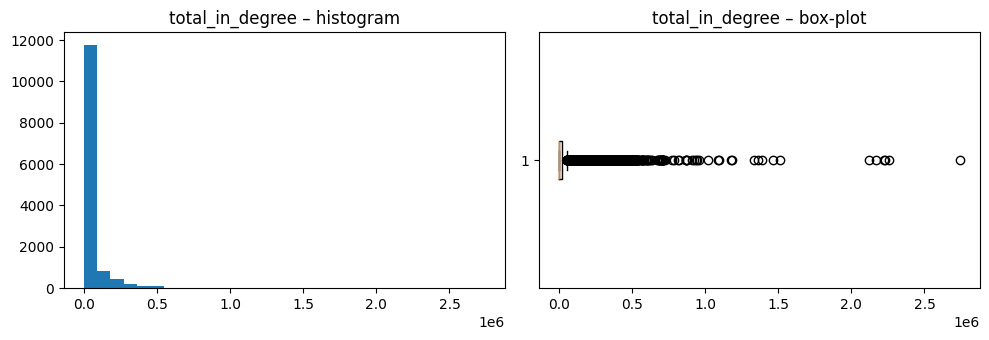

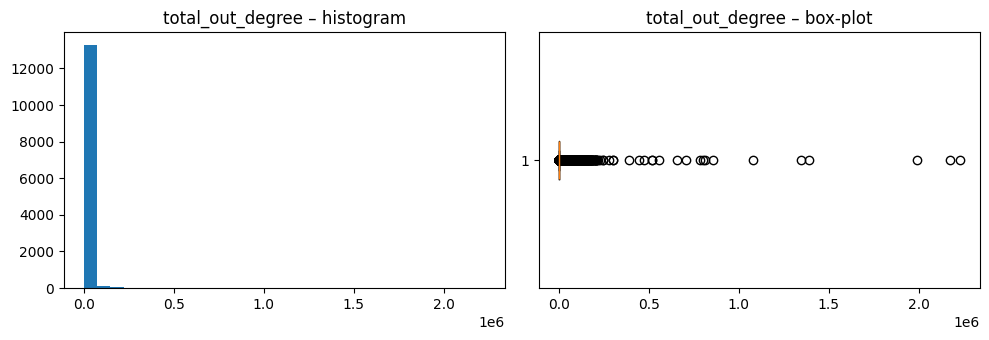

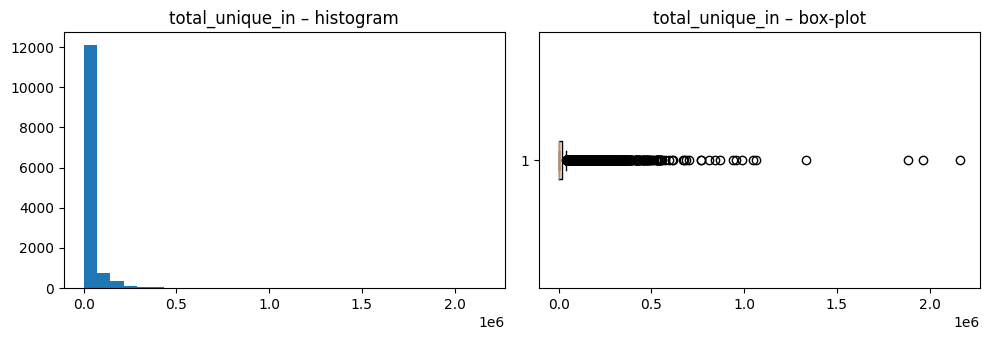

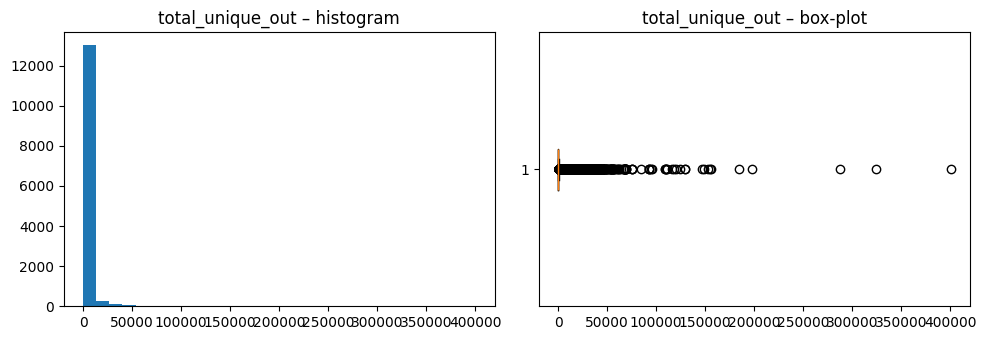

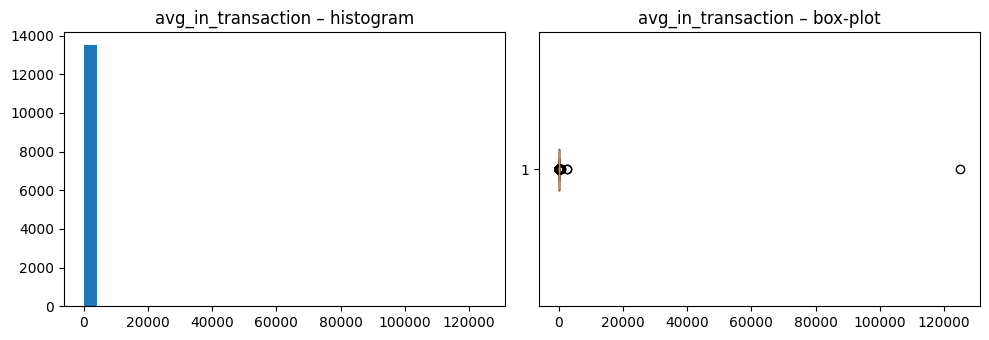

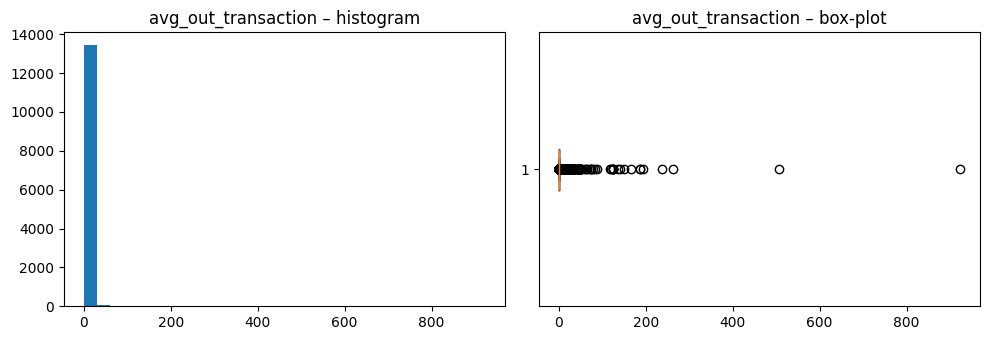

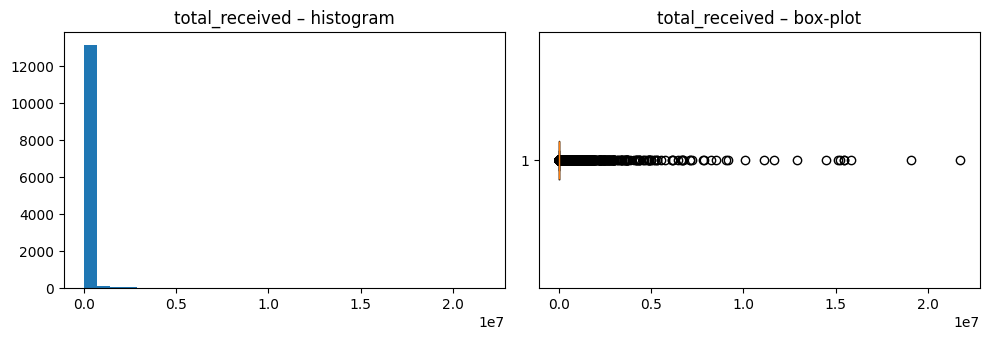

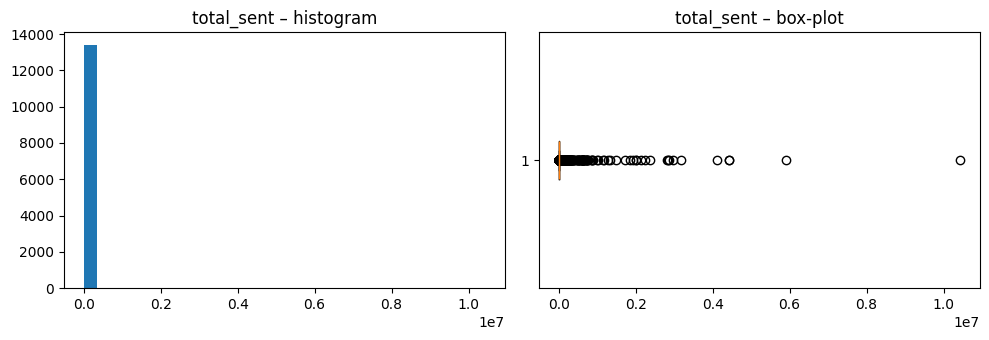

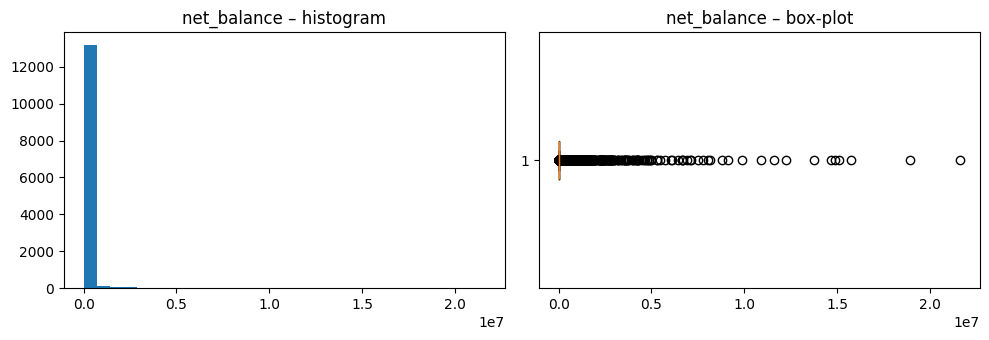

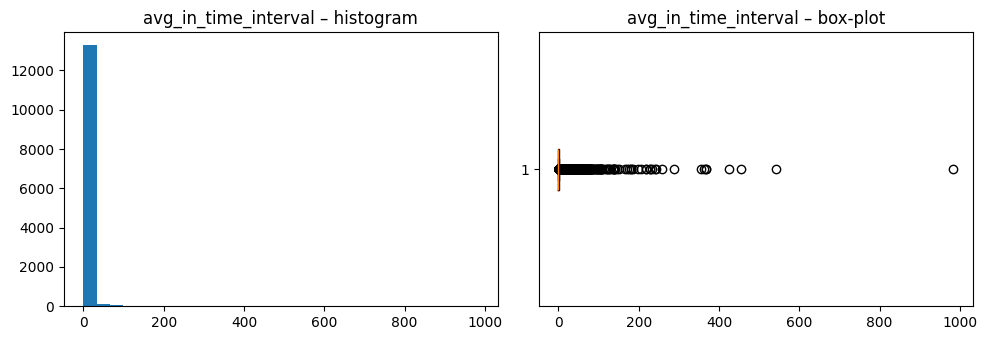

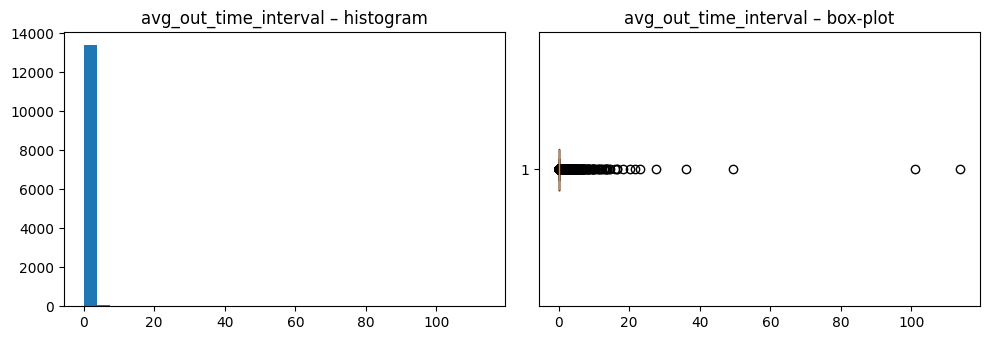

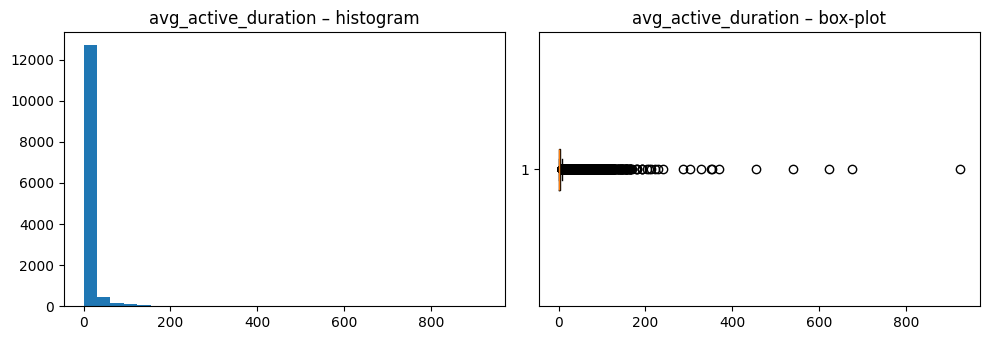

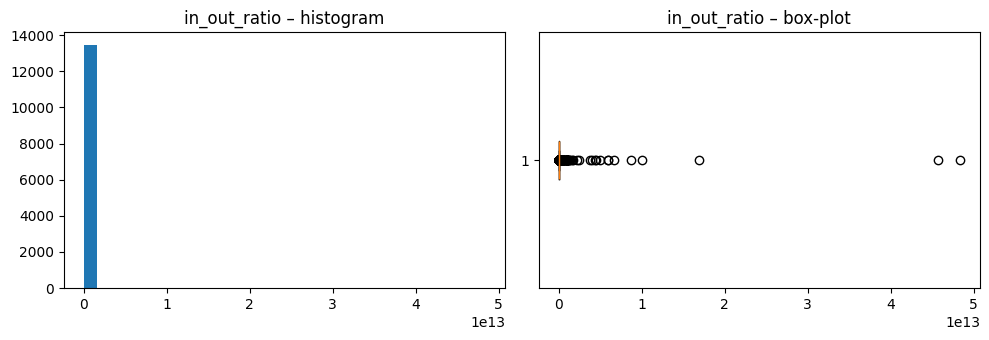

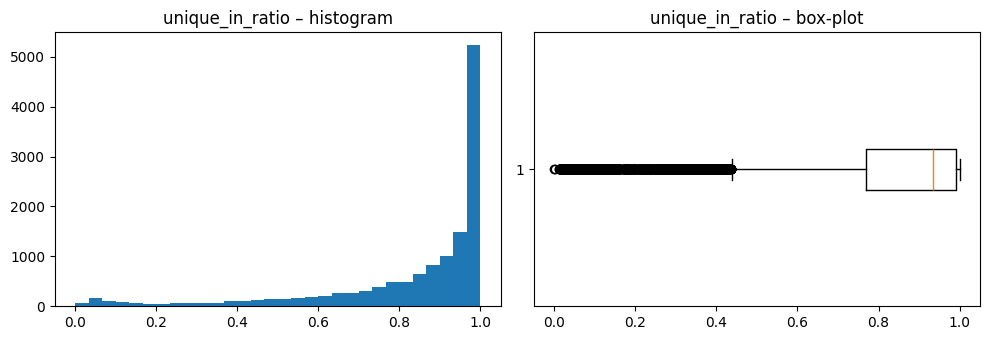

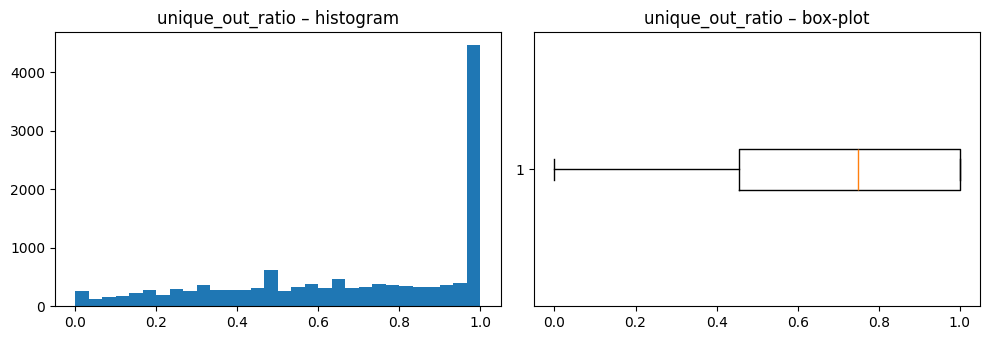

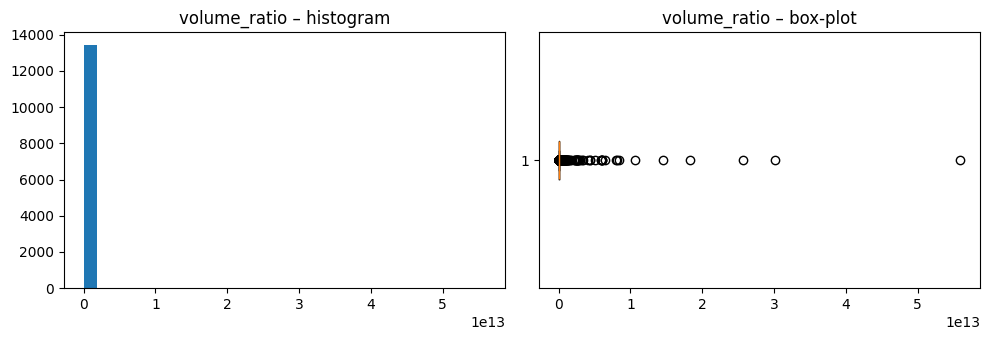

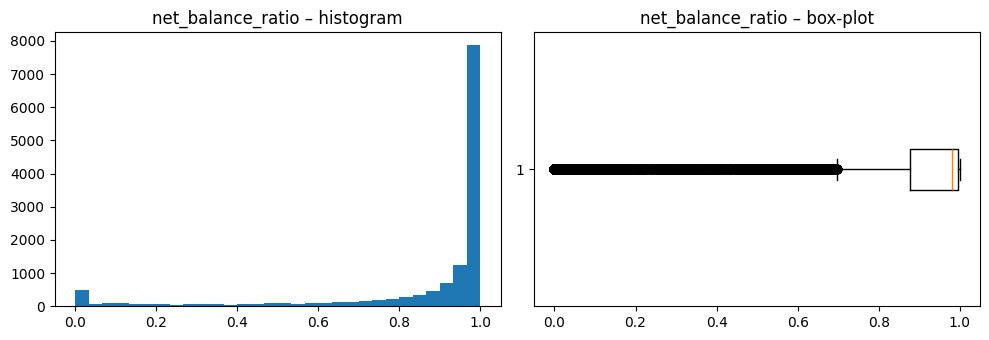

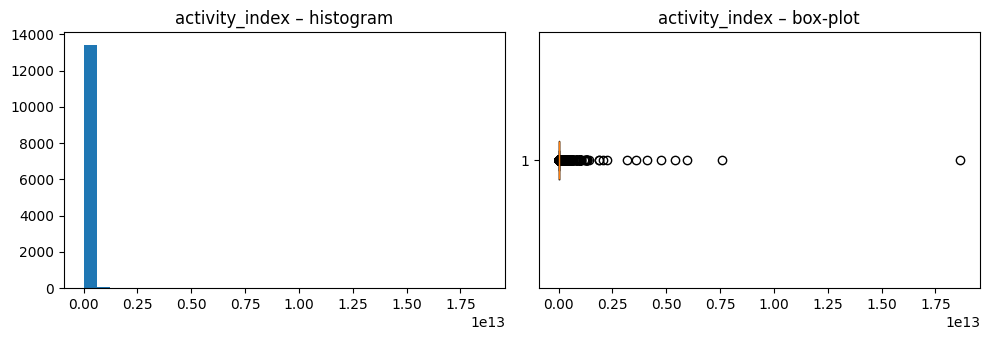

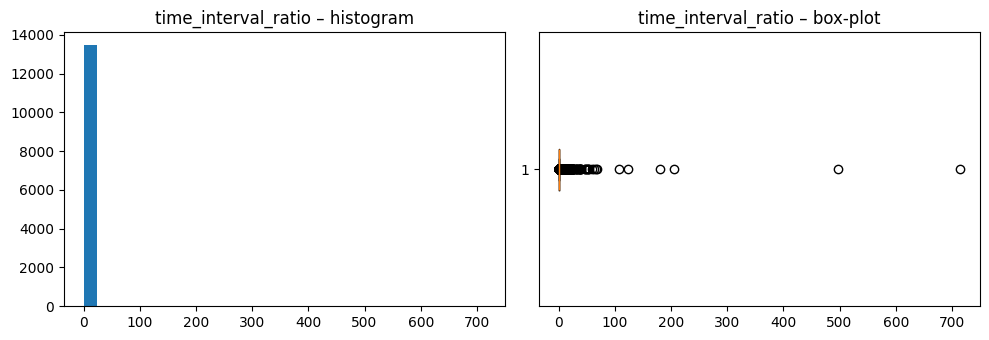

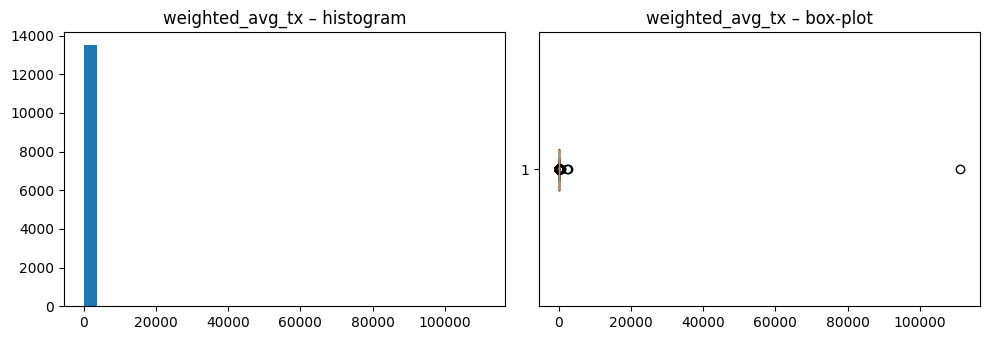

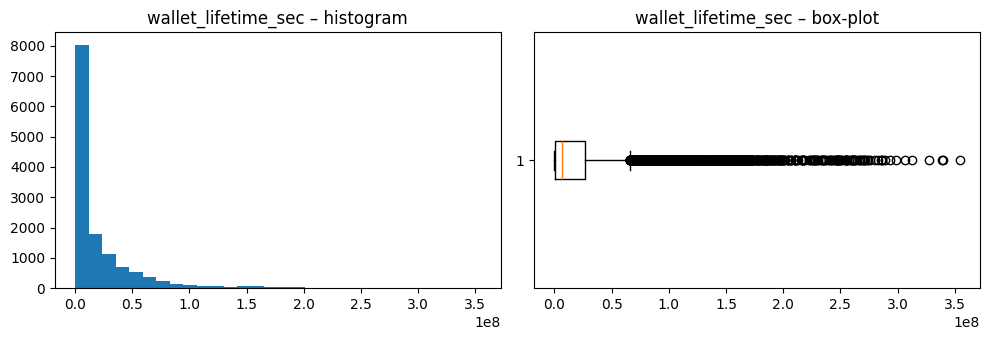

In [7]:
# =============================================================================
# 4️⃣  HISTOGRAMS & BOX-PLOTS (NUMERIC)
# =============================================================================
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))
    # Histogram
    axes[0].hist(df[col].dropna(), bins=30)
    axes[0].set_title(f"{col} – histogram")
    # Box-plot
    axes[1].boxplot(df[col].dropna(), vert=False)
    axes[1].set_title(f"{col} – box-plot")
    plt.tight_layout()
    plt.show()


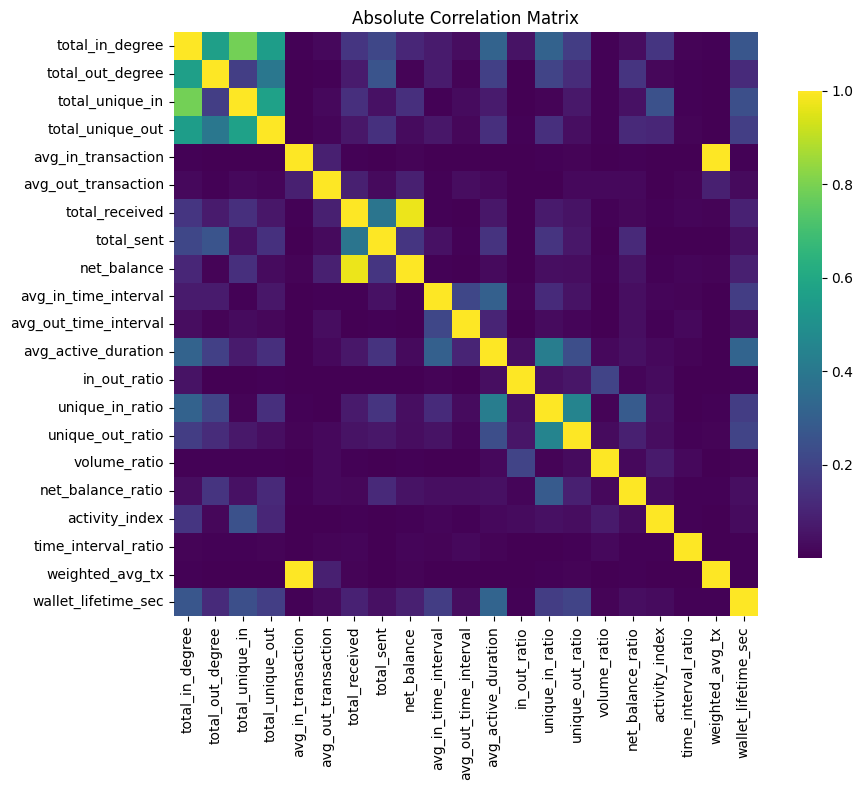

,Feature 1,Feature 2,Correlation
0,avg_in_transaction,weighted_avg_tx,0.999996
1,total_received,net_balance,0.970706


In [8]:
# =============================================================================
# 5️⃣  CORRELATION HEAT-MAP
# =============================================================================
corr = df[num_cols].corr().abs()

plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            cmap="viridis",
            square=True,
            fmt=".2f",
            cbar_kws={"shrink": .8})
plt.title("Absolute Correlation Matrix")
plt.tight_layout()
plt.show()

# High-correlation pairs (|ρ| > 0.80)
THRESHOLD = 0.80
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr = [(row, col, upper.loc[row, col])
             for row in upper.index
             for col in upper.columns
             if upper.loc[row, col] > THRESHOLD]

high_corr_df = (pd.DataFrame(high_corr,
                             columns=["Feature 1", "Feature 2", "Correlation"])
                .sort_values("Correlation", ascending=False))
display(high_corr_df)


In [ ]:
#introdurre descrizione su correlation discussione aggregata 